# Фильтр Калмана

In [118]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [119]:
# запишем функцию, которая принимает на вход время, а возвращает угол поворота
def func_ugol_povorota (t):
    ugol = 2 * np.pi * t
    return ugol

In [120]:
# функция, которая принимает на вход амплитуду и угол поворота, и возвращает координаты точки на экг
def coordinates (a, phi):
    coord = 2*a*(1 - np.cos(phi))*np.cos(phi), 2*a*(1 - np.cos(phi))*np.sin(phi)
    return coord

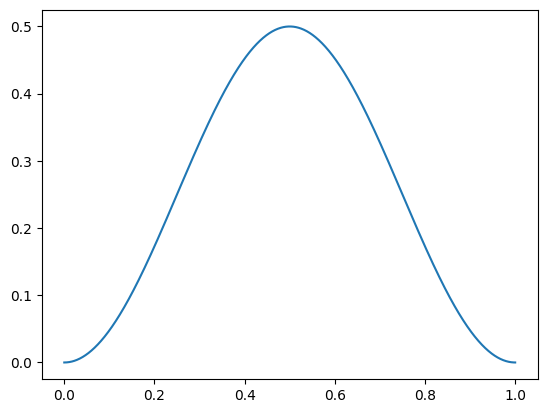

In [122]:
# задаём волну
a=1 #амплитуда
t = np.linspace(0, 1, 1250) #время
s = -a/4 * np.cos(2 * np.pi * t) + a/4 #сигнал
plt.plot(t, s)

In [123]:
# Далее необходимо сгенерировать сигнал, который представляет собой последовательность повторяющихся циклов
def cycle (a, T, n):
    # задаём время
    t1 = np.linspace(0, 1, 1250)
    t2 = np.linspace(0, 1, 1000)
    t3 = np.linspace(0, 1, 1250)

    x1 = np.zeros(2000)
    x2 = -a/4 * np.cos(2 * np.pi * t1) + a/4
    x3 = np.zeros(250)
    x4, _ = coordinates(a, func_ugol_povorota(t2))
    x5 = -a/2 * np.cos(2 * np.pi * t3) + a/2
 
    signal = np.append(x1, x2) # создаём экг сигнал
    signal = np.append(signal, x3)
    signal = np.append(signal, -x4)
    signal = np.append(signal, x3)
    signal = np.append(signal, x5)

    t = np.linspace(0, T*n, 6000*n)
    S = signal.copy()
    for i in range(n-1):
        S = np.append(S, signal)

    return t, S

In [124]:
time, signal = cycle (1, 1, 3)

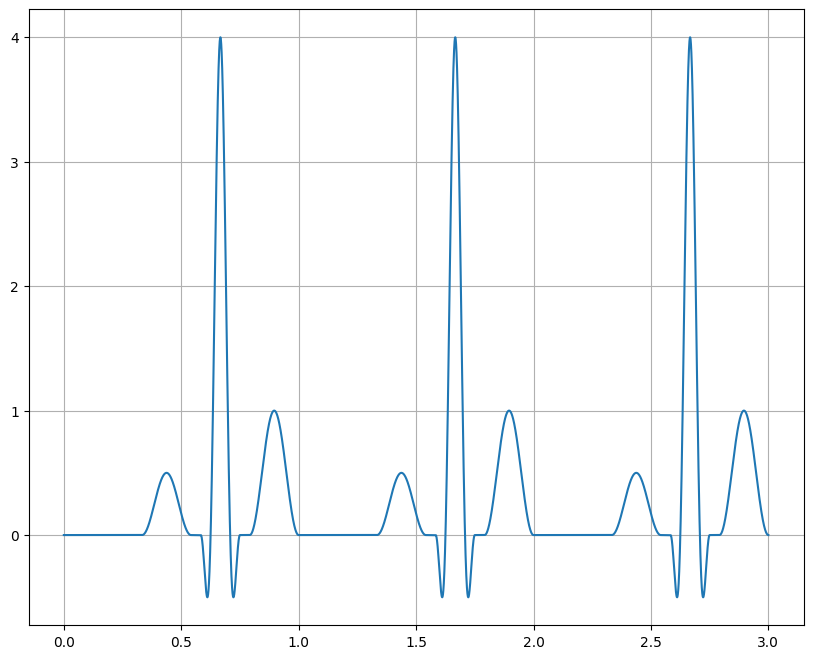

In [125]:
plt.figure(figsize = (10,8))
plt.plot(time, signal) # строим три волны сигнала экг
plt.grid()

In [126]:
def filt (s, t, alpha = 0.55, beta = 0.0003): # реализуем фильтр Калмана
    x0 = s[0]
    filtered = [x0]
    deff0 = 0
    for i in range(1, len(t)):

        x_new = x0 + alpha*(s[i]- x0) # используем формулу фильтра Калмана для сглаживания временного ряда
        deff1 = deff0 + beta*(s[i] - deff0) / (t[i] - t[i-1])

        x0 = x_new + (t[i] - t[i-1])*deff1
        deff0 = deff1
        filtered.append(x_new)

    return filtered

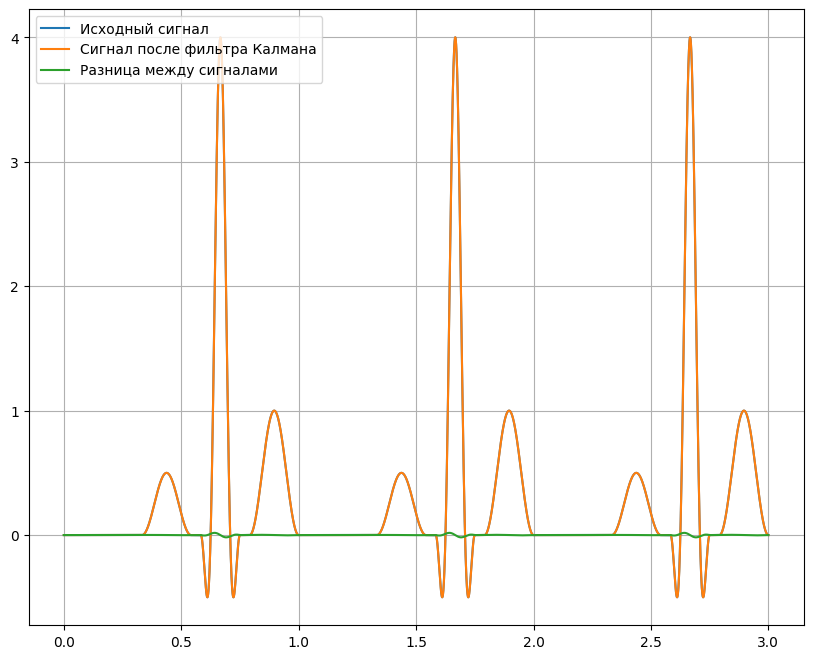

In [127]:
filted_signal = filt(signal, time)
plt.figure(figsize = (10,8))
plt.plot(time, signal, label = "Исходный сигнал")
plt.plot(time, filted_signal, label = "Сигнал после фильтра Калмана")
plt.plot(time, signal - filted_signal, label = "Разница между сигналами")
plt.grid()
plt.legend(loc='upper left')

In [132]:
# задаём некоторый шум
n = np.random.uniform(-1, 1, time.shape)
sn = signal + n

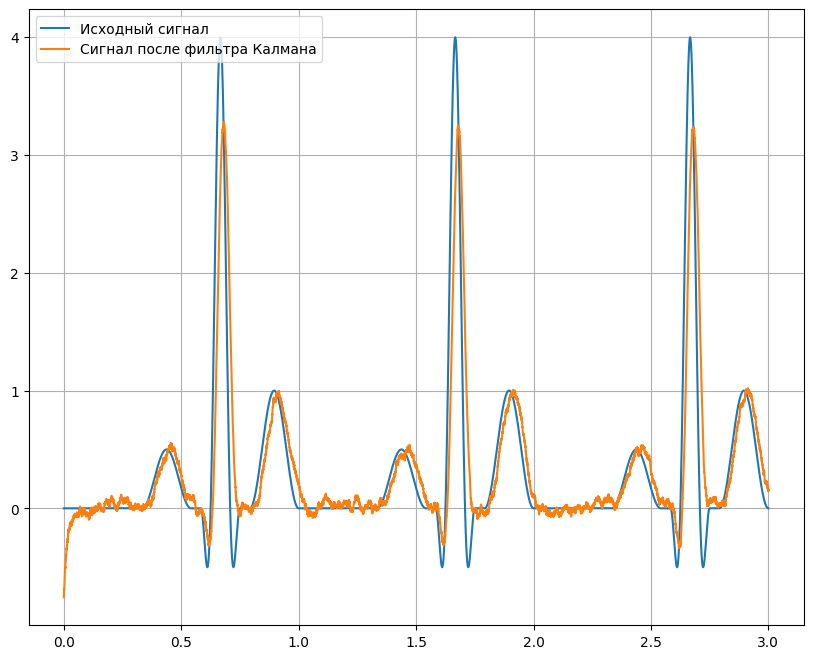

In [133]:
filtered = filt (sn, time, 0.009, 0.00005)
plt.figure(figsize = (10,8))
plt.plot(time, signal, label = "Исходный сигнал")
plt.plot(time, filtered, label = "Сигнал после фильтра Калмана")
plt.grid()
plt.legend(loc='upper left')

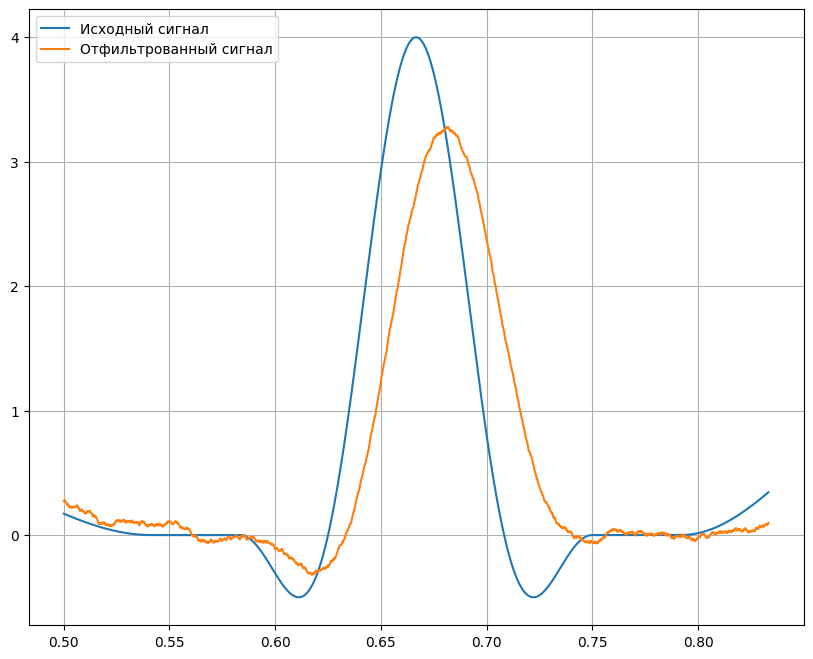

In [134]:
n1, n2 = 3000, 5000
plt.figure(figsize = (10,8))
plt.plot(time[n1:n2], signal[n1:n2], label = "Исходный сигнал")
plt.plot(time[n1:n2], filtered[n1:n2], label = "Отфильтрованный сигнал")
plt.grid()
plt.legend(loc='upper left')

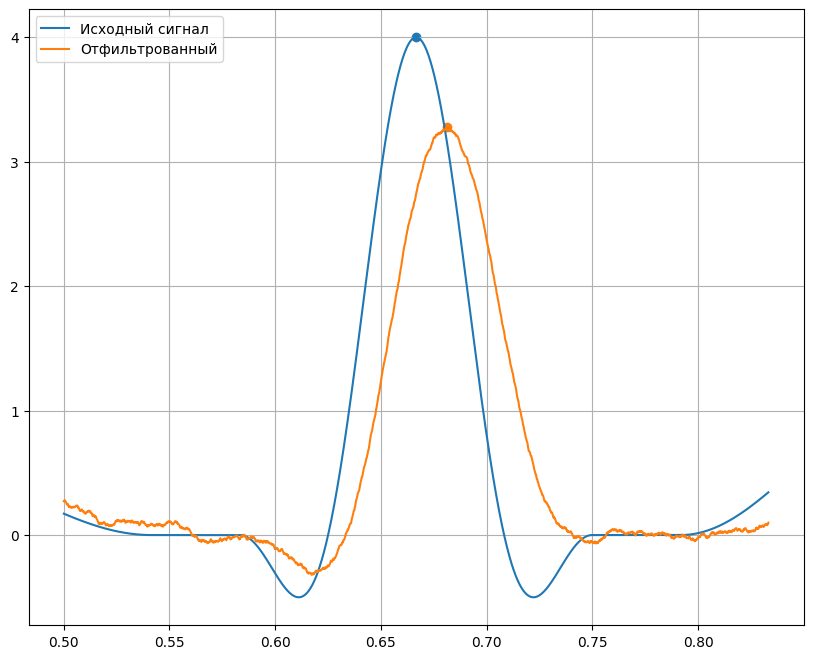

In [135]:
# Находим пики на сигналах
peaks_signal, _ = find_peaks(signal[n1:n2], 2)
peaks_filt, _ = find_peaks(filtered[n1:n2], 2, distance = 300)

filtered_new = np.array(filtered)
signal_new = np.array(signal)
plt.figure(figsize = (10,8))
plt.plot(time[n1:n2], signal_new[n1:n2], label = "Исходный сигнал")
plt.scatter(time[n1 + peaks_signal], signal_new[n1 + peaks_signal])

plt.plot(time[n1:n2], filtered_new[n1:n2], label = "Отфильтрованный")
plt.scatter(time[n1 + peaks_filt], filtered_new[n1 + peaks_filt])
plt.grid()
plt.legend(loc='upper left')

In [136]:
0

0